This notebook walks you through some of the steps for making a three color image with python. These instructions draw heavily on the Quickstart guide and tutorial for aplpy:

https://aplpy.readthedocs.io/en/stable/

In [52]:
# start by importing the necessities

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

We will be using aplpy to make a 3-color image. aplpy is not already available in colab but we can download it inline so we can use it in this colab session.

If you are running this on your own computer, much better to install aplpy directly (see instructions on the readthedoc page).

In [53]:
#get aplpy to use in colab
!pip install aplpy
import aplpy

If everyhing went well, the last line of the messages that printed beneath the cell above should say something like "Successfully installed aplpy-2.2.0 astropy-healpix-1.0.3 crc32c-2.7.1 donfig-0.8.1.post1 ..."

For this example, we'll be using data from the Hubble 20th Anniversary image. Want to take a look yourself? You can download the high-level science products (HLSPs) from the Milkulski Archive for Space Telescopes (MAST):
https://archive.stsci.edu/prepds/carina/wfc3/

Or once you've master this for one object, try it with image of another object: https://archive.stsci.edu/prepds/heritage/

In [54]:
#assign the looong filenames to variables that will be easier to call later

f657n_fn = '/content/drive/MyDrive/ASTR230/example_data/HST_JWST_images/small_halpha.fits'
f673n_fn = '/content/drive/MyDrive/ASTR230/example_data/HST_JWST_images/small_sii.fits'
f502n_fn = '/content/drive/MyDrive/ASTR230/example_data/HST_JWST_images/small_oiii.fits'

In [55]:
f657n = fits.open(f657n_fn)

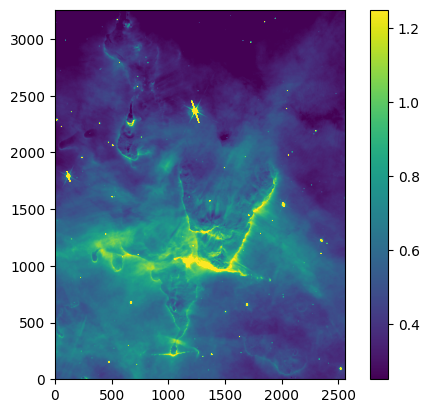

In [56]:
plt.imshow(f657n[0].data, origin='lower', vmin=0.25, vmax=1.25)
plt.colorbar()

First, we need to combine the separate images into a 3D cube with separate layers for the red, green, and blue channels.

In [57]:
# Make a 3D cube with the images in RGB order
aplpy.make_rgb_cube([f673n_fn, f657n_fn, f502n_fn], 'MM_cube.fits')

# Make an RGB image
aplpy.make_rgb_image('MM_cube.fits', 'MM_rgb.png')

INFO:astropy:Red:
INFO:astropy:vmin =  1.915e-02 (auto)
INFO:astropy:vmax =  2.773e-01 (auto)


INFO: Red: [aplpy.rgb]
INFO: vmin =  1.915e-02 (auto) [aplpy.rgb]
INFO: vmax =  2.773e-01 (auto) [aplpy.rgb]


INFO:astropy:Green:
INFO:astropy:vmin =  1.660e-01 (auto)
INFO:astropy:vmax =  1.339e+00 (auto)
INFO:astropy:Blue:
INFO:astropy:vmin =  3.515e-02 (auto)
INFO:astropy:vmax =  3.665e-01 (auto)


INFO: Green: [aplpy.rgb]
INFO: vmin =  1.660e-01 (auto) [aplpy.rgb]
INFO: vmax =  1.339e+00 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  3.515e-02 (auto) [aplpy.rgb]
INFO: vmax =  3.665e-01 (auto) [aplpy.rgb]


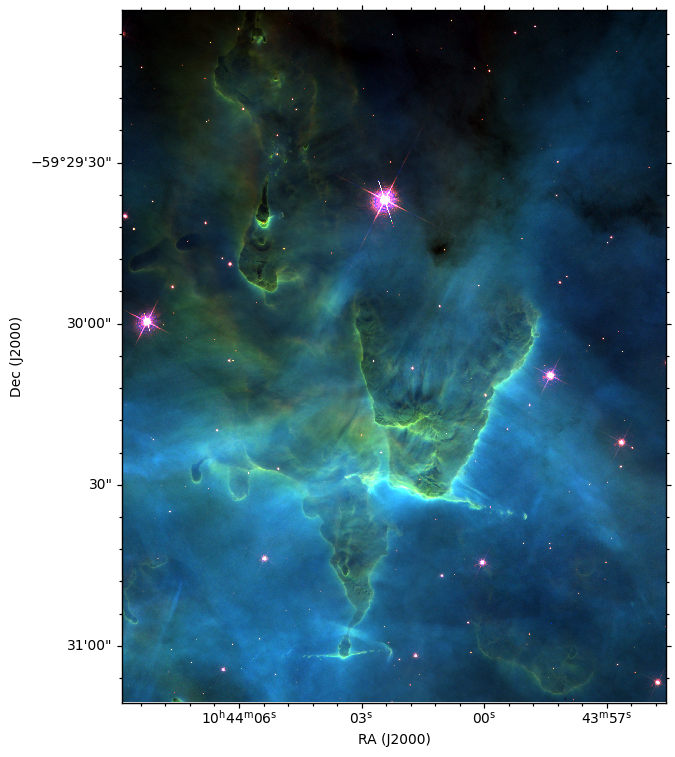

In [58]:
# Plot the RGB image using one of the three images to indicate the projection
f = aplpy.FITSFigure(f657n_fn)
f.show_rgb('MM_rgb.png')

This already looks pretty good to start but we won't always be this lucky with the first attempt to make a three color image.

You can adjust the image scaling of each image when you make the RGB. This is very similar to adjusting the image scaling for each image in an RGB frame in ds9.

In [59]:
# Make an RGB image
aplpy.make_rgb_image('MM_cube.fits', 'MM_rgb.png',
                     vmin_g=0.25, vmax_r=0.13)

INFO:astropy:Red:
INFO:astropy:vmin =  1.899e-02 (auto)
INFO:astropy:vmax =  1.300e-01


INFO: Red: [aplpy.rgb]
INFO: vmin =  1.899e-02 (auto) [aplpy.rgb]
INFO: vmax =  1.300e-01 [aplpy.rgb]


INFO:astropy:Green:
INFO:astropy:vmin =  2.500e-01
INFO:astropy:vmax =  1.271e+00 (auto)


INFO: Green: [aplpy.rgb]
INFO: vmin =  2.500e-01 [aplpy.rgb]
INFO: vmax =  1.271e+00 (auto) [aplpy.rgb]


INFO:astropy:Blue:
INFO:astropy:vmin =  3.521e-02 (auto)
INFO:astropy:vmax =  3.611e-01 (auto)


INFO: Blue: [aplpy.rgb]
INFO: vmin =  3.521e-02 (auto) [aplpy.rgb]
INFO: vmax =  3.611e-01 (auto) [aplpy.rgb]


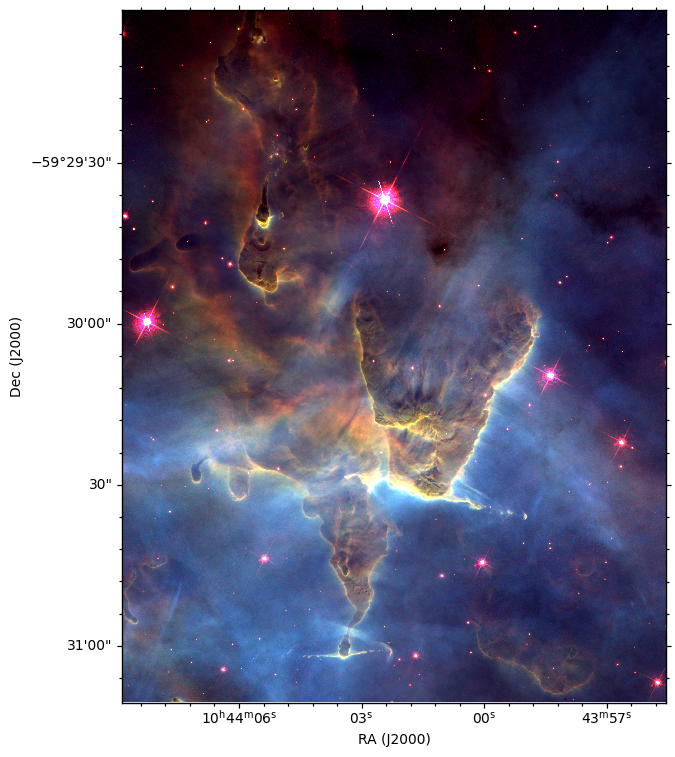

In [60]:
# Plot the RGB image using one of the three images to indicate the projection
f = aplpy.FITSFigure(f657n_fn)
f.show_rgb('MM_rgb.png')

From here, you can do a lot of things to change and improve the aesthetics of the plot. I usually make the axis and tick labels larger so that they are easy to read. You can also try adding a scale bar and labels, e.g., for the famous jets in the image.